In [1]:
import torch
import torch.utils.data as Data
import numpy as np    
import matplotlib.pyplot as plt
from PIL import Image
import os

In [2]:
TRAIN_DIR = './200_cats_200_dogs'    #Path to the train folder
TEST_DIR = './25_test_cats_dogs'      #Path to the test folder

In [3]:
IMG_SIZE = 80

In [4]:
fname1 = "cat.1.jpg"
fname2 = "cat.2.jpg"
fname3 = "cat.3.jpg"

In [5]:
fname_with_path1 = TRAIN_DIR + '/' + fname1
fname_with_path2 = TRAIN_DIR + '/' + fname2
fname_with_path3 = TRAIN_DIR + '/' + fname3

In [6]:
img1 = Image.open(fname_with_path1).resize((IMG_SIZE, IMG_SIZE))
img2 = Image.open(fname_with_path2).resize((IMG_SIZE, IMG_SIZE))
img3 = Image.open(fname_with_path3).resize((IMG_SIZE, IMG_SIZE))

In [7]:
imgTensor1 = torch.from_numpy(np.array(img1))
imgTensor2 = torch.from_numpy(np.array(img2))
imgTensor3 = torch.from_numpy(np.array(img3))
print(imgTensor1.shape, imgTensor2.shape, imgTensor3.shape)

torch.Size([80, 80, 3]) torch.Size([80, 80, 3]) torch.Size([80, 80, 3])


# Convert tesnor from [80, 80, 3] to [1, 80, 80, 3] so that we can append them together

In [8]:
tensor1 = imgTensor1.view(1, 80, 80, 3)
tensor2 = imgTensor2.view(1, 80, 80, 3)
tensor3 = imgTensor3.view(1, 80, 80, 3)

In [9]:
x = torch.cat((tensor1, tensor2), 0)

In [10]:
x.shape

torch.Size([2, 80, 80, 3])

In [11]:
x = torch.cat((x, tensor3), 0)

In [12]:
x.shape

torch.Size([3, 80, 80, 3])

# Visualize x to verify our input data format is correct

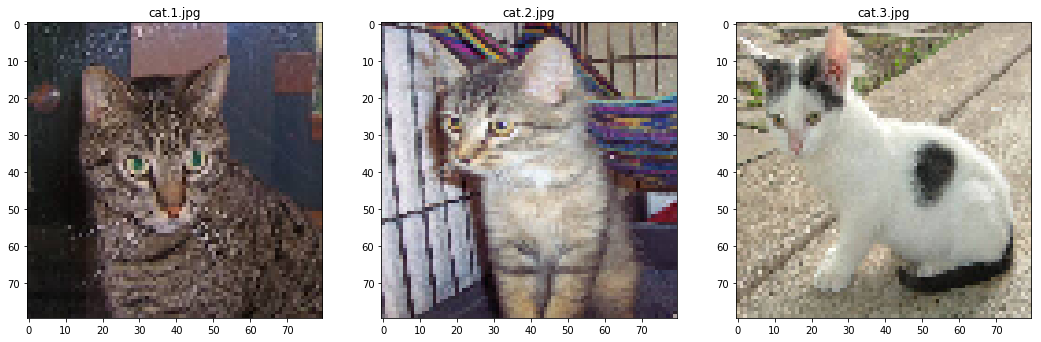

In [13]:
fig = plt.figure(figsize=(18, 9)) 
a=fig.add_subplot(1, 3, 1) # we have a 1 rows * 3 columns subplots
plt.title(fname1)
plt.imshow(x[0].numpy())

a=fig.add_subplot(1, 3, 2) 
plt.title(fname2)
plt.imshow(x[1].numpy())

a=fig.add_subplot(1, 3, 3) 
plt.title(fname3)
plt.imshow(x[2].numpy())

plt.show()